In [ ]:
#https://word2vec.kr

In [1]:
import re
from lxml import etree #parser
from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
targetText = etree.parse(open('word2vec/ted_en-20160408.xml', 'r', encoding='utf-8'))

In [8]:
parseText = "\n".join(targetText.xpath("//content/text()"))
#content 태그 내부의 내용을 추출

In [10]:
parseText[:100]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo m"

In [17]:
contentText = re.sub('\([^)]*\)', '', parseText) # (배경음)  제거

In [21]:
sentText = sent_tokenize(contentText)
#문장 단위 토큰화

In [22]:
#대문자 => 소문자, 구두점 제거
normalizedText=[]
for sent in sentText:
    tokens = re.sub("[^a-z0-9]+", " ",sent.lower())
    normalizedText.append(tokens)
result=[word_tokenize(s) for s in normalizedText]

In [23]:
len(result) #27만여개 단어로 구성됨

273424

In [24]:
for i in result[:5]:
    print(i)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']
['consider', 'facit']
['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them']


In [25]:
from gensim.models import Word2Vec

In [26]:
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [27]:
#임베딩 벡터 차원
#window: 윈도 크기
#min_count: 최소 5번 이상 등장한 단어들 대상
#sg: 스킵그램(1), cbow(0)
model.wv.most_similar("phone")

[('card', 0.7204047441482544),
 ('phones', 0.7142956852912903),
 ('smartphone', 0.6621471047401428),
 ('telephone', 0.656679093837738),
 ('arm', 0.6487033367156982),
 ('wrist', 0.6445411443710327),
 ('iphone', 0.6416234970092773),
 ('facebook', 0.6405648589134216),
 ('shoes', 0.6313228607177734),
 ('car', 0.6294615268707275)]

In [28]:
model.wv.most_similar(positive=['computer'], topn=20)

[('software', 0.7443077564239502),
 ('machine', 0.7413706183433533),
 ('camera', 0.6979812383651733),
 ('3d', 0.6946854591369629),
 ('robot', 0.6911940574645996),
 ('device', 0.6881412863731384),
 ('program', 0.6663470268249512),
 ('printer', 0.661370038986206),
 ('simulation', 0.66062331199646),
 ('chip', 0.6383401155471802),
 ('video', 0.6315816044807434),
 ('interface', 0.6278887391090393),
 ('circuit', 0.6276886463165283),
 ('desktop', 0.6235224008560181),
 ('mechanical', 0.616519570350647),
 ('prototype', 0.6002280712127686),
 ('laser', 0.5988448858261108),
 ('keyboard', 0.5946177244186401),
 ('scanner', 0.5940006375312805),
 ('mri', 0.5929059386253357)]

In [29]:
import pandas as pd

C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [31]:
trainData = pd.read_table("word2vec/ratings.txt")

In [32]:
trainData[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [39]:
#null 확인
trainData.isnull().values.any()
#null값이 있는 행 전체 제거
trainData = trainData.dropna(how='any') 

In [43]:
trainData['document'] = trainData['document'].str.replace("[^가-힣]ㄱ-ㅎㅏ-ㅣ ","")

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
trainData[:20]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [45]:
stopwords=["하다","한","에","와","자","과","걍","잘","좀","는","의","가","이","은","들"]

In [46]:
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [48]:
okt = Okt()
tokenizedData=[]
for sent in trainData['document']:
    t = okt.morphs(sent, stem=True) #형태소 단위로 분리
    t = [w for w in t if not w in stopwords]
    tokenizedData.append(t)

95
12.642450698027922


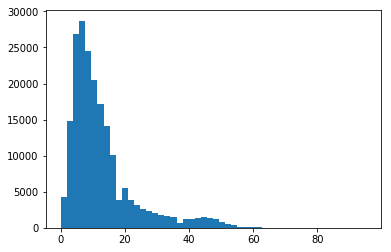

In [52]:
#tokenizedData에 저장된 리뷰에 대해
#리뷰 최대 길이
print(max(len(l) for l in tokenizedData))
    
#stem:어근, norm:그래욬ㅋㅋㅋ => 그래요
#리뷰 평균 길이
print(sum(map(len, tokenizedData))/len(tokenizedData))

plt.hist([len(s) for s in tokenizedData], bins=50)
plt.show()

In [53]:
model = Word2Vec(sentences=tokenizedData, size=100, window=5, min_count=5, workers=4, sg=0)

In [54]:
model.wv.vectors.shape

(17618, 100)

In [60]:
model.wv.most_similar("주윤발")

[('잭슨', 0.8483279943466187),
 ('이정재', 0.8225216865539551),
 ('공리', 0.79071444272995),
 ('양동근', 0.7888356447219849),
 ('최민수', 0.7817972302436829),
 ('톰크루즈', 0.7789877653121948),
 ('임청하', 0.7742549777030945),
 ('이병헌', 0.7740447521209717),
 ('윌리스', 0.7639580965042114),
 ('원표', 0.7627084851264954)]

In [ ]:
#구글 word2vec 모델: 3백만개 단어 벡터

In [62]:
from gensim.models import Word2Vec

In [64]:
model = Word2Vec.load("word2vec/ko.bin")

In [68]:
model.wv.most_similar("아저씨")
model.wv.most_similar("모델")
model.wv.most_similar("고객")
model.wv.most_similar("구매")

[('구입', 0.8432365655899048),
 ('판매', 0.7250126004219055),
 ('매입', 0.6791813373565674),
 ('대여', 0.6570079326629639),
 ('결제', 0.6531978845596313),
 ('지불', 0.6490845680236816),
 ('공급자', 0.6160480380058289),
 ('납품', 0.6104522347450256),
 ('인출', 0.6025936603546143),
 ('제공', 0.6014571785926819)]

In [ ]:
# https://dumps.wikimedia.org/kowiki 위키피디아 한국어 덤프